In [1]:
import cPickle as pk
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as cm
import numpy as np
import random
%matplotlib inline

In [6]:
N=1000
nodeColor=[]
lisofrelevantsizes = [i*i*30 for i in range(1,30) if i*i < 10000]
if N not in lisofrelevantsizes:
    print "the number of agents doesn't fit the grid, changing to closest possibility\n"
    N=min(lisofrelevantsizes, key=lambda x:abs(x-N))
    print "the closest number is: " + str(N) + "\n"
filename= "files/topolgy"+str(N)+".pk"
with open(filename, 'rb') as input:
    G = pk.load(input)

the number of agents doesn't fit the grid, changing to closest possibility

the closest number is: 1080



In [7]:
Beta=0.005
for edge in G.edges():
    G[edge[0]][edge[1]]['weight'] = 2.7**(-Beta*abs(G.node[edge[0]]['height'] - G.node[edge[1]]['height']))
for x in G.nodes():
    nodeColor.append(int(G.node[x]['height']))

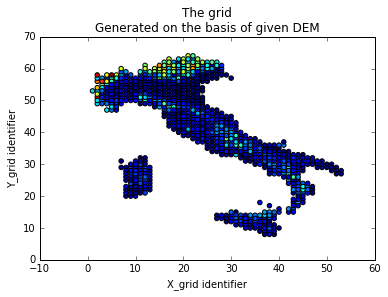

In [8]:
fig=plt.figure()
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >=0.05]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <0.05]
nx.draw_networkx_edges(G, pos={i:i for i in G.nodes()}, edgelist=elarge, width=2)
nx.draw_networkx_edges(G, pos={i:i for i in G.nodes()}, edgelist=esmall, width=2, alpha=0.5,edge_color='b', 
                       style='dashed')
nx.draw_networkx_nodes(G, pos={i:i for i in G.nodes()}, node_color=nodeColor, 
                       node_cmap=plt.cm.summer, node_size=20)
plt.xlabel('X_grid identifier')
plt.ylabel('Y_grid identifier')
plt.title('The grid\nGenerated on the basis of given DEM')
plt.show()